In [10]:
import numpy as np
from matplotlib import pyplot as plt

## Разностная схема

In [33]:
a, b = 0.1, 0.8
UA, UB = 6.0, 0.6
n = 150
x = np.linspace(a, b, n + 1)
h = (b - a) / n


def f(x):
    return x


def finite_difference_variable_k(N, k, f):
    """Решение СЛАУ без метода прогонки"""
    x = np.linspace(a, b, N + 1)

    A = np.zeros((N + 1, N + 1))  # Матрица коэффициентов
    B = np.zeros(N + 1)  # Правая часть

    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i + 1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i - 1])) / 2  # k_{i-1/2}

        A[i, i - 1] = -k_i_m_half / h ** 2
        A[i, i] = (k_i_p_half + k_i_m_half) / h ** 2
        A[i, i + 1] = -k_i_p_half / h ** 2

        B[i] = f(x[i])

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA

    A[N, N] = 1
    B[N] = UB

    u = np.linalg.solve(A, B)

    return x, u  # Возвращаем значения u (решение) и x (узлы)

## Разные k(x)

In [34]:
from typing import List, Tuple, Any


def create_plot(k_funcs: List[Tuple[Any, str]]):
    for k_func, describton in k_funcs:
        _, U = finite_difference_variable_k(n, k_func, f)
        plt.plot(x, U, label=describton)
    plt.legend()
    plt.grid(True)

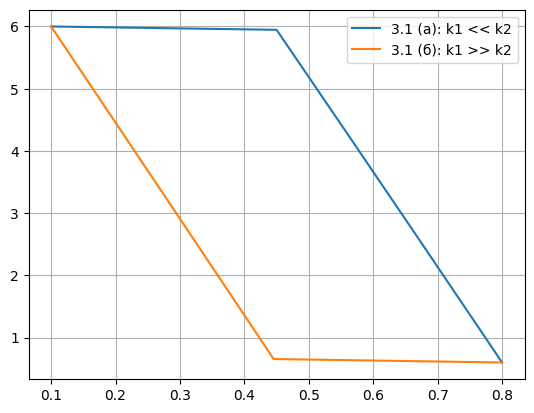

In [35]:
k_funcs = []


def create_K(k1, k2):
    def K(x):
        if a <= x <= 0.5 * (b + a):
            return k1
        if 0.5 * (a + b) < x <= b:
            return k2

    return K


k_funcs.append((create_K(100, 1), "3.1 (a): k1 << k2"))
k_funcs.append((create_K(1, 100), "3.1 (б): k1 >> k2"))

create_plot(k_funcs)

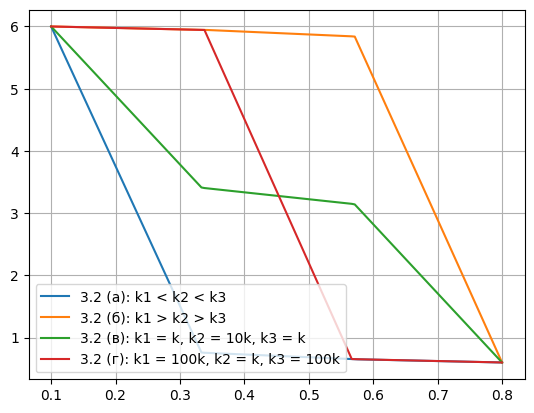

In [36]:
k_funcs = []


def create_K(k1, k2, k3):
    def K(x):
        if a <= x <= a + (b - a) / 3:
            return k1
        if a + (b - a) / 3 <= x <= a + 2 * (b - a) / 3:
            return k2
        if a + 2 * (b - a) / 3 < x <= b:
            return k3

    return K


k_funcs.append((create_K(1, 50, 100), "3.2 (а): k1 < k2 < k3"))
k_funcs.append((create_K(100, 50, 1), "3.2 (б): k1 > k2 > k3"))
k_funcs.append((create_K(10, 100, 10), "3.2 (в): k1 = k, k2 = 10k, k3 = k"))
k_funcs.append((create_K(100, 1, 100), "3.2 (г): k1 = 100k, k2 = k, k3 = 100k"))

create_plot(k_funcs)

## f(x) — точечный источник тепла